# Geometric Context from single image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage import measure
from PIL import Image
import random

In [2]:
path_test = 'dataset/structure31.jpg'

In [3]:
image = Image.open(path_test)

In [4]:
np.array(image).shape

(600, 800, 3)

In [5]:
#First Step: segment the image
#segments_fz return a matrix where M_ij = id of the superpixel the pixel belongs to
segments_fz = felzenszwalb(image, scale=100, sigma=0.1, min_size=1000)

#Compute statistics about the superpixels
regions = measure.regionprops(segments_fz, intensity_image=np.array(image)[:,:,2])


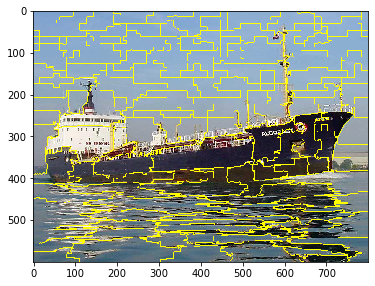

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(mark_boundaries(image, segments_fz))

In [7]:
def compute_features(region_array):
    '''Compute the feature vector per region/superpixel'''
    unique_regions = list(np.unique(region_array))
    d = {r:np.random.randn(10) for r in unique_regions}
    return d
    
def similarity(reg_a,reg_b,feature_dict):
    '''Compute the similarity of two regions based on the feature dictionary'''
    return np.sum(feature_dict[reg_a]*feature_dict[reg_b])
    

In [39]:
def segmentation(image, k_sel=32, n_iterations=50):
    
    #Array storing the region of pixels
    region_map = np.zeros((image.shape[0], image.shape[1]))
    
    #First step : Generate superpixels
    segments_sp = felzenszwalb(image, scale=100, sigma=0.1, min_size=1000)
    
    #Boolean to monitor the termination
    change = True
    
    while change:
        
        change = False
        
        #Compute the feature dict of each region
        d_feat = compute_features(segments_sp)
        
        # Randomly order them and assign the first k to different regions
        unique = np.unique(segments_sp)
        np.random.shuffle(unique)
        random_reg, remaining_sp = unique[:k_sel], unique[k_sel:]
        
        #Dict storing the new regions
        d_new_reg = {r:r for r in random_reg}
        for r_sp in remaining_sp:
            d_new_reg[r_sp] = sorted([(similarity(r_sp,x,d_feat),x) for x in random_reg], key=lambda tup: tup[0])[-1][1]        
            
            
        for k in d_new_reg:
            if d_new_reg[k] != k:
                change=True
                segments_sp = np.where(segments_sp==k,d_new_reg[k],segments_sp)
    
    return segments_sp

    

In [43]:
X = segmentation(np.array(image),k_sel=10)

In [45]:
np.unique(X)

array([ 16,  31,  34,  44,  47,  82, 102, 115, 122, 125], dtype=int64)

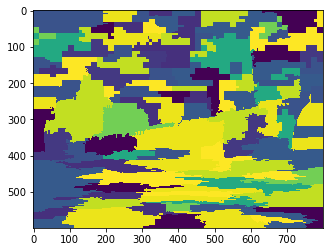

In [48]:
plt.imshow(X)